In [33]:
useReduced = False
fillNaN = True
performMerge = False
methodForNaN = 'ffill'

# PROJECT

In [34]:
# Necessary imports for the python program
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [35]:
# Read file
data_set = pd.read_csv('Data/data_set.csv', 
                       parse_dates=['date'], 
                       infer_datetime_format=True)

# Dimensions
data_set.shape
# Display first five lines
data_set.head()

# Data Description
# item_sku_id -> number between 2 and 40 and it represents a specific product (SKU stands for stock keeping unit)
# dc_id -> ID of the distribution center
# quantity -> number of items of that SKU sold that day
# vendibility -> whether or not stock is available at the end of a day, 0: not available, 1: available
# original_price -> price of each product
# discount -> daily average discount

(71658, 7)

,item_sku_id,dc_id,date,quantity,vendibility,original_price,discount
0,6,4,2017-03-12,0.00,1.00,NaN,NaN
1,6,4,2017-04-29,0.00,1.00,NaN,NaN
2,6,4,2017-09-01,0.00,1.00,NaN,NaN
3,6,4,2017-09-13,0.00,1.00,NaN,NaN
4,6,4,2017-12-01,1.00,1.00,0.01,10.00


In [36]:
# Read file
sku_info = pd.read_csv('Data/sku_info_40.csv')
# Dimensions
sku_info.shape
# Display first five lines
sku_info.head()

# Data Description
# item_sku_id -> number between 1 and 40 and it represents a specific product (SKU stands for stock keeping unit)
# item_first_cate_cd -> item first category code
# item_second_cate_cd -> item second category code
# item_third_cate_cd -> item third category code
# brand_code -> brand code

(40, 5)

,item_sku_id,item_first_cate_cd,item_second_cate_cd,item_third_cate_cd,brand_code
0,1,1,5,366,198
1,2,1,7,298,158
2,3,7,29,144,1040
3,4,7,29,145,70
4,5,1,4,17,707


In [37]:
# Merge the data frames
if performMerge:
    sku_data_set = pd.merge(data_set, sku_info, 
                            how='inner', 
                            on=['item_sku_id'])
    # Re-arrange the columns
    sku_data_set = sku_data_set.loc[:, ["item_sku_id","item_first_cate_cd","item_second_cate_cd","item_third_cate_cd","brand_code","dc_id","date","quantity","vendibility","original_price","discount"]]
    # Dimensions
    sku_data_set.shape
    # Display first five lines
    sku_data_set.head()
else:
    sku_data_set = data_set.copy()

## Exploratory Data Analysis

In [38]:
sku_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71658 entries, 0 to 71657
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   item_sku_id     71658 non-null  int64         
 1   dc_id           71658 non-null  int64         
 2   date            71658 non-null  datetime64[ns]
 3   quantity        71658 non-null  float64       
 4   vendibility     71658 non-null  float64       
 5   original_price  37622 non-null  float64       
 6   discount        37622 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 3.8 MB


In [39]:
sku_data_set.isna().sum()

item_sku_id           0
dc_id                 0
date                  0
quantity              0
vendibility           0
original_price    34036
discount          34036
dtype: int64

In [40]:
# Approach 1: Replace NANs with 0
if fillNaN:
    sku_data_set = sku_data_set.fillna(method=methodForNaN)
    sku_data_set = sku_data_set.fillna(0)
else:
    sku_data_set = sku_data_set.dropna()
sku_data_set.isna().sum()
if useReduced:
    sku_data_set = sku_data_set.sample(frac=0.1, weights='item_sku_id', random_state=1)
sku_data_set.info()

item_sku_id       0
dc_id             0
date              0
quantity          0
vendibility       0
original_price    0
discount          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71658 entries, 0 to 71657
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   item_sku_id     71658 non-null  int64         
 1   dc_id           71658 non-null  int64         
 2   date            71658 non-null  datetime64[ns]
 3   quantity        71658 non-null  float64       
 4   vendibility     71658 non-null  float64       
 5   original_price  71658 non-null  float64       
 6   discount        71658 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 3.8 MB


In [41]:
sku_data_set['item_sku_id'].sort_values().unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40], dtype=int64)

In [42]:
sku_data_set['item_sku_id'].sort_values().value_counts()

13    3006
37    3006
26    3002
36    2997
28    2995
21    2994
22    2994
32    2992
38    2970
27    2934
6     2873
2     2793
8     2787
23    2750
7     2562
39    2504
18    2190
17    1968
33    1836
9     1831
29    1770
10    1753
19    1399
12    1267
34    1191
40    1163
24    1102
35    1065
25    1041
11     924
20     924
30     905
3      890
14     605
4      569
31     424
5      310
15     186
16     186
Name: item_sku_id, dtype: int64

In [43]:
# Perform transformations on column date
sku_data_set.date.head()
sku_data_set['date_year'] = sku_data_set['date'].dt.year
sku_data_set['date_month'] = sku_data_set['date'].dt.month
sku_data_set['date_week'] = sku_data_set['date'].dt.isocalendar().week
sku_data_set['date_day'] = sku_data_set['date'].dt.day
sku_data_set['date_dayofweek'] = sku_data_set['date'].dt.dayofweek
sku_data_set.head()
sku_data_set.info()

0   2017-03-12
1   2017-04-29
2   2017-09-01
3   2017-09-13
4   2017-12-01
Name: date, dtype: datetime64[ns]

,item_sku_id,dc_id,date,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
0,6,4,2017-03-12,0.00,1.00,0.00,0.00,2017,3,10,12,6
1,6,4,2017-04-29,0.00,1.00,0.00,0.00,2017,4,17,29,5
2,6,4,2017-09-01,0.00,1.00,0.00,0.00,2017,9,35,1,4
3,6,4,2017-09-13,0.00,1.00,0.00,0.00,2017,9,37,13,2
4,6,4,2017-12-01,1.00,1.00,0.01,10.00,2017,12,48,1,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71658 entries, 0 to 71657
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   item_sku_id     71658 non-null  int64         
 1   dc_id           71658 non-null  int64         
 2   date            71658 non-null  datetime64[ns]
 3   quantity        71658 non-null  float64       
 4   vendibility     71658 non-null  float64       
 5   original_price  71658 non-null  float64       
 6   discount        71658 non-null  float64       
 7   date_year       71658 non-null  int64         
 8   date_month      71658 non-null  int64         
 9   date_week       71658 non-null  UInt32        
 10  date_day        71658 non-null  int64         
 11  date_dayofweek  71658 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(4), int64(6)
memory usage: 6.4 MB


In [44]:
cols = sku_data_set.select_dtypes(include=np.number).columns.tolist()
cols

['item_sku_id',
 'dc_id',
 'quantity',
 'vendibility',
 'original_price',
 'discount',
 'date_year',
 'date_month',
 'date_week',
 'date_day',
 'date_dayofweek']

In [45]:
sku_data_set[cols].describe()

,item_sku_id,dc_id,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
count,"71,658.00","71,658.00","71,658.00","71,658.00","71,658.00","71,658.00","71,658.00","71,658.00","71,658.00","71,658.00","71,658.00"
mean,22.16,2.11,7.26,0.83,0.02,8.00,"2,016.71",6.98,28.55,15.87,3.02
std,11.33,1.56,27.38,0.38,0.05,2.09,0.46,3.40,14.81,8.85,2.01
min,2.00,0.00,0.00,0.00,0.00,0.00,"2,016.00",1.00,1.00,1.00,0.00
25%,12.00,1.00,0.00,1.00,0.00,6.47,"2,016.00",4.00,16.00,8.00,1.00
50%,23.00,2.00,1.00,1.00,0.00,8.76,"2,017.00",8.00,31.00,16.00,3.00
75%,32.00,3.00,4.00,1.00,0.01,10.00,"2,017.00",10.00,40.00,24.00,5.00
max,40.00,5.00,"2,539.00",1.00,0.24,10.00,"2,017.00",12.00,53.00,31.00,6.00


<AxesSubplot:>

item_sku_id


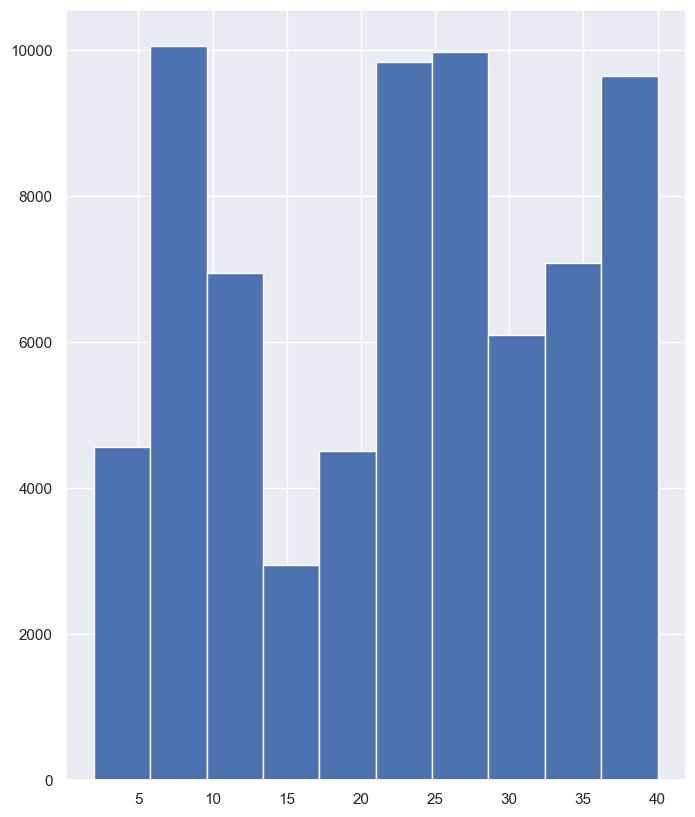

<AxesSubplot:>

dc_id


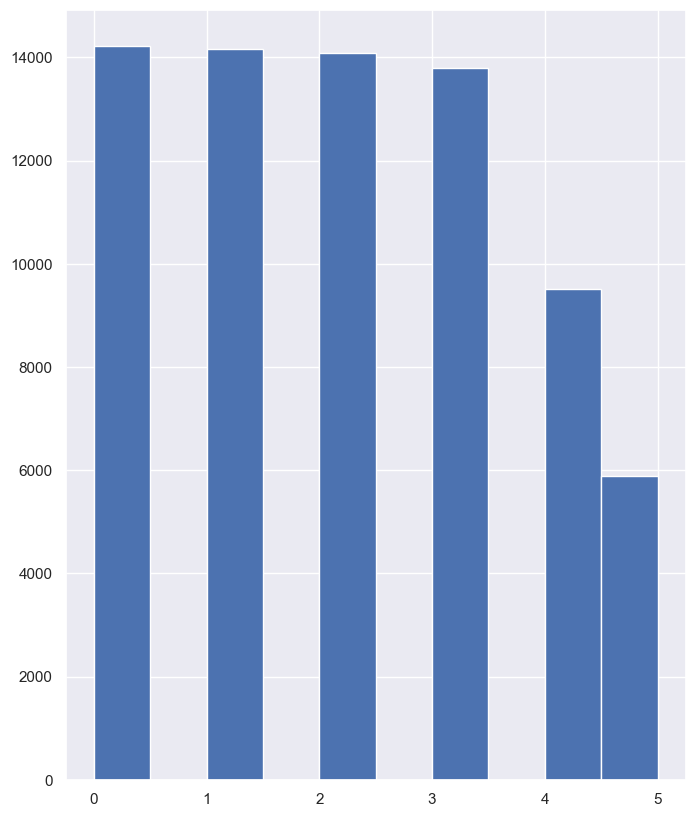

<AxesSubplot:>

quantity


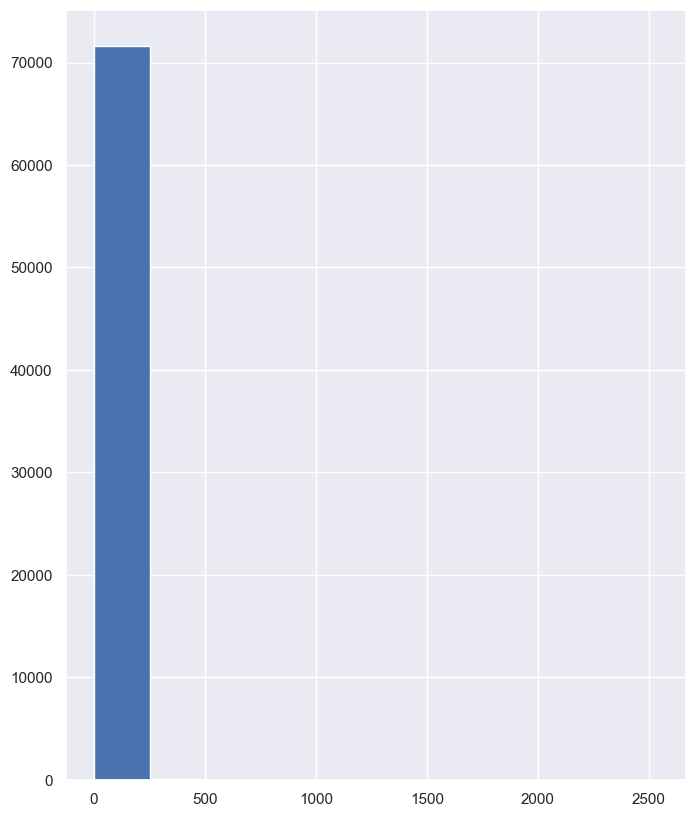

<AxesSubplot:>

vendibility


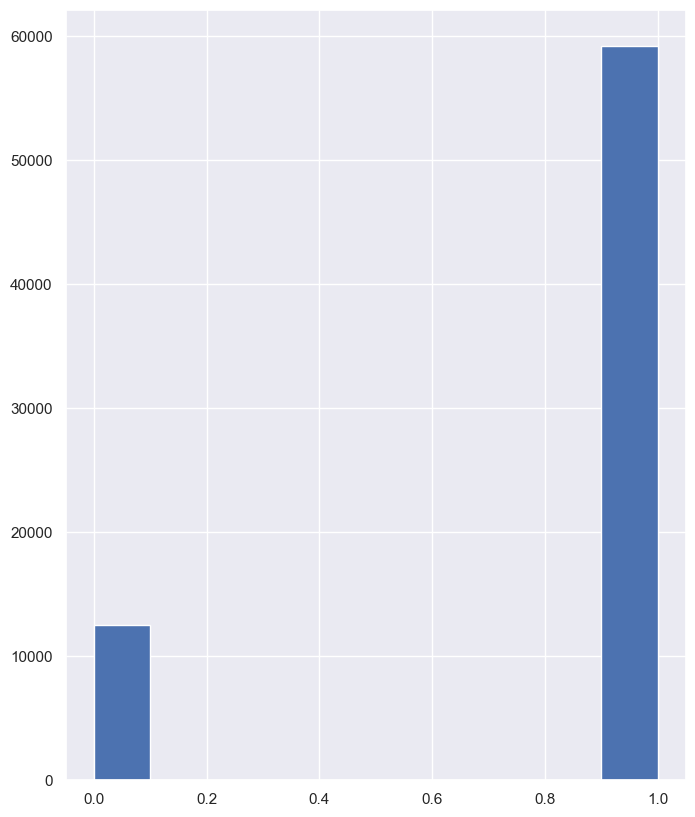

<AxesSubplot:>

original_price


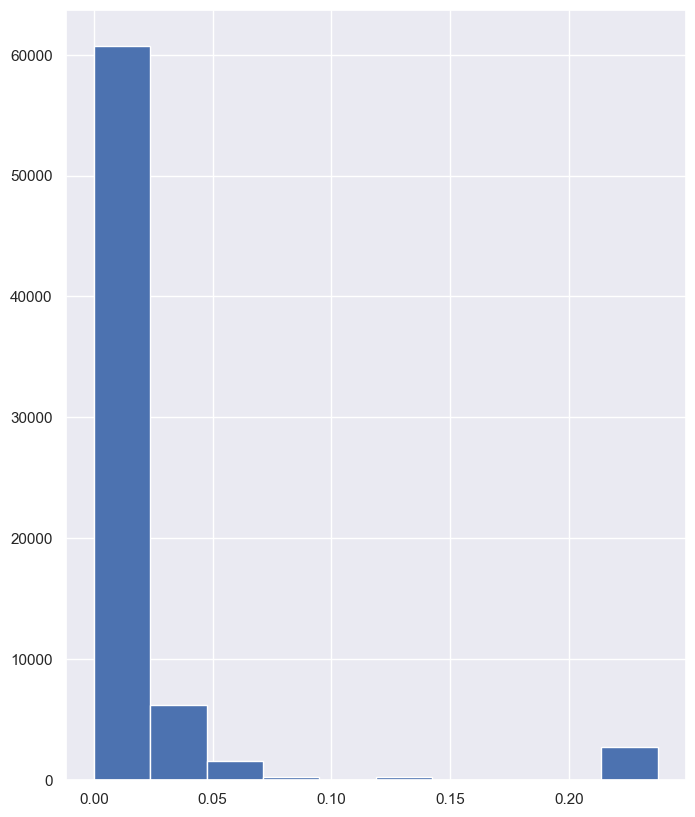

<AxesSubplot:>

discount


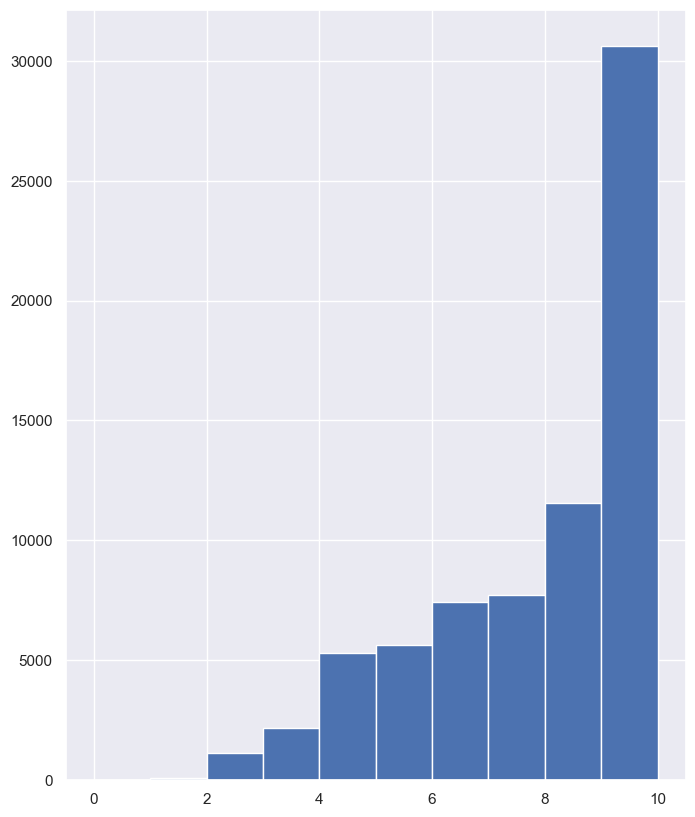

<AxesSubplot:>

date_year


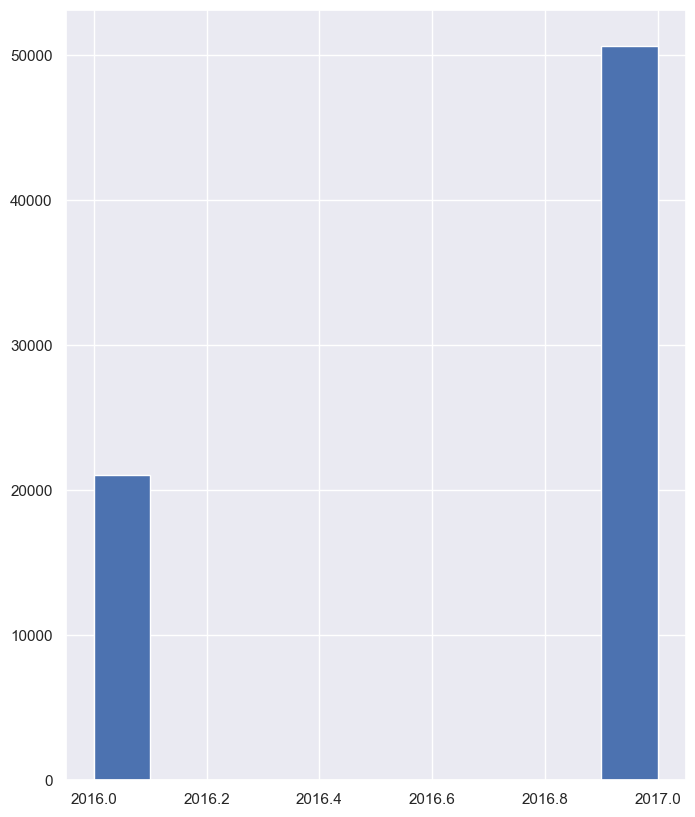

<AxesSubplot:>

date_month


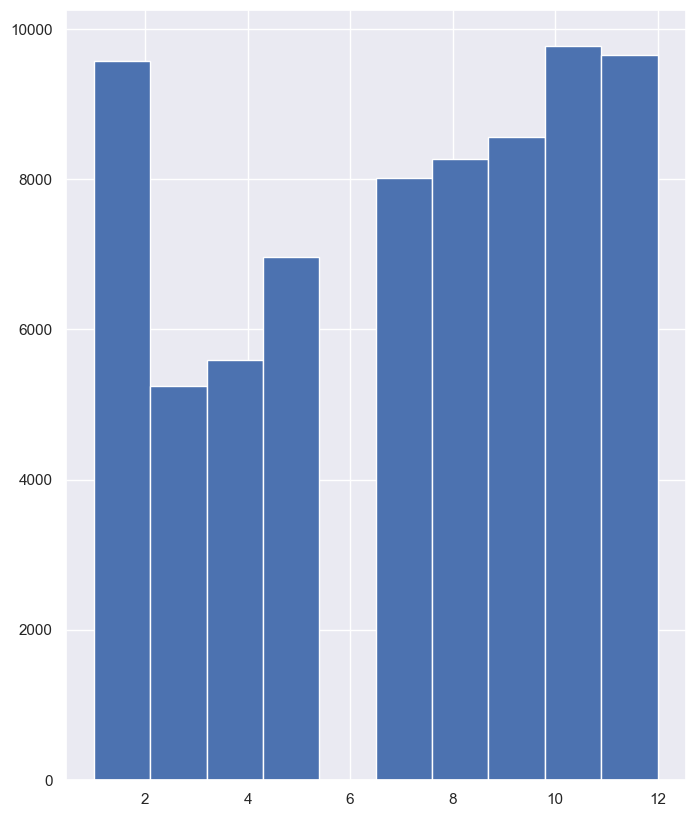

<AxesSubplot:>

date_week


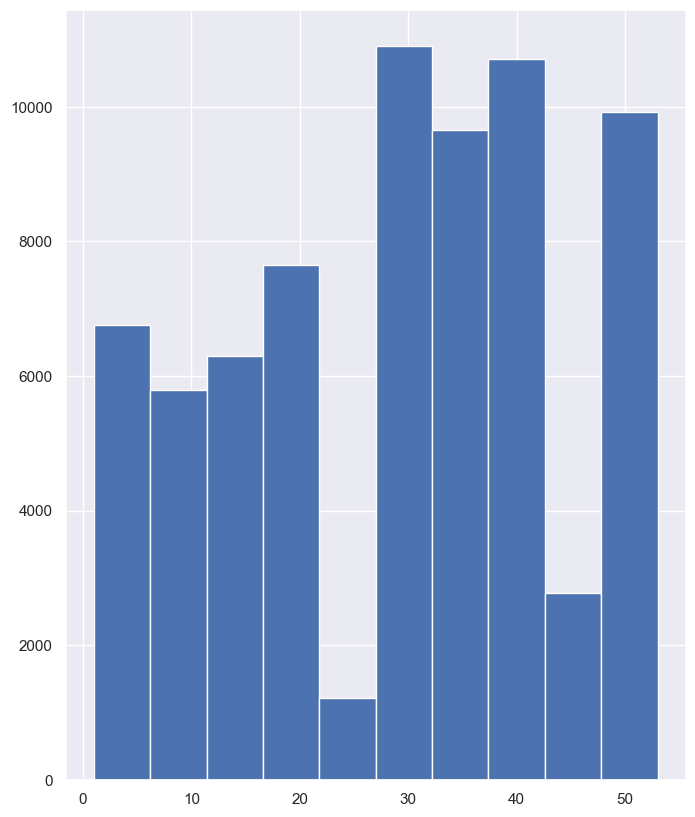

<AxesSubplot:>

date_day


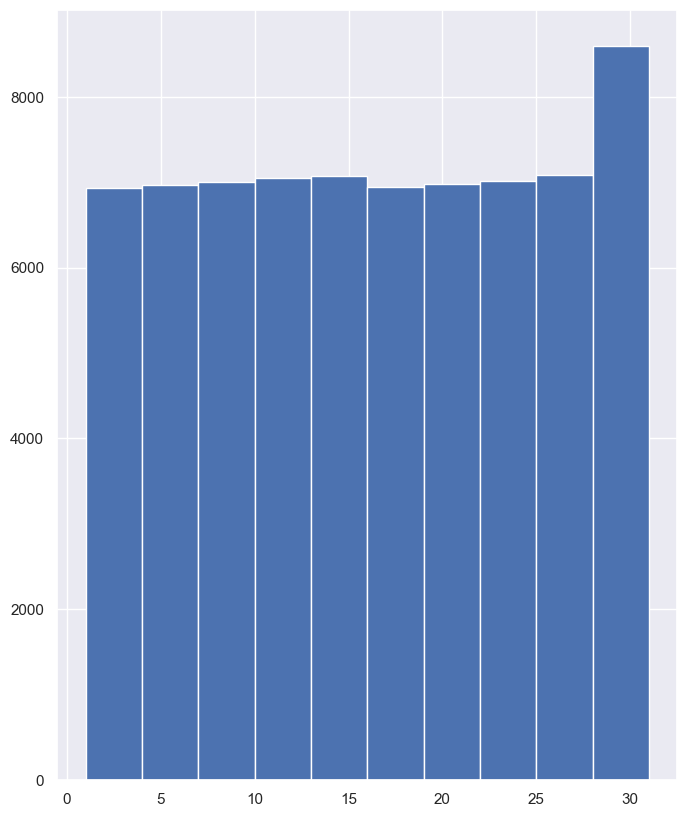

<AxesSubplot:>

date_dayofweek


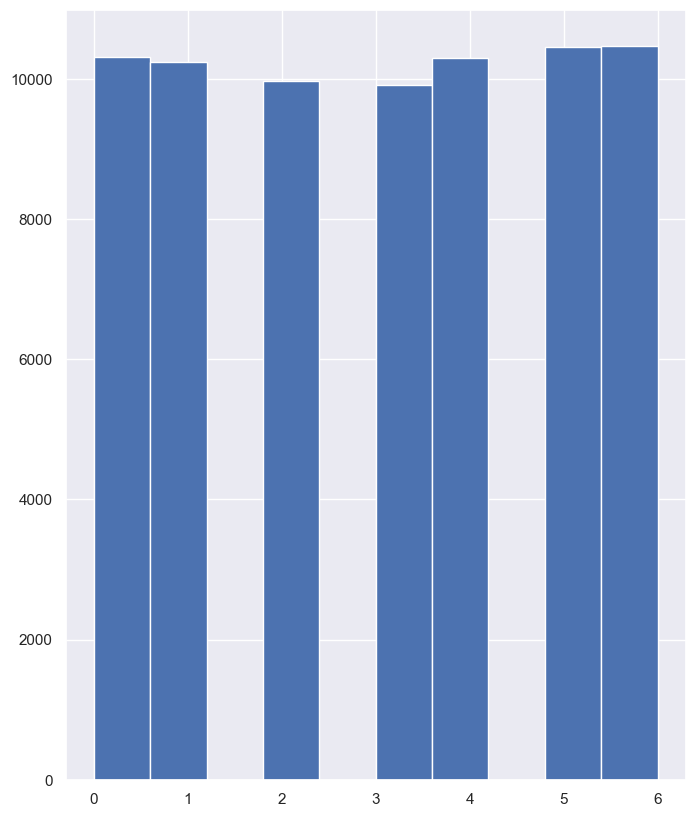

In [46]:
# Plot histograms 
for col in cols: 
    sku_data_set[col].hist()
    print(col)
    plt.savefig('Plots/' + col + '_histogram')
    plt.show()

<AxesSubplot:xlabel='count', ylabel='item_sku_id'>

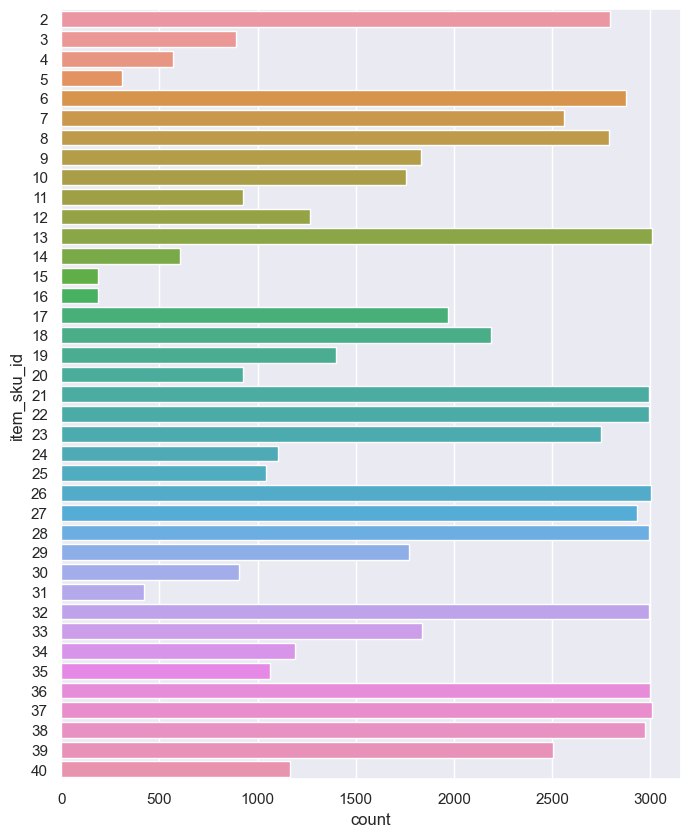

In [47]:
sns.set(rc={"figure.figsize":(8, 10)})
sns.countplot(data=sku_data_set, y='item_sku_id',label="Count")
plt.savefig('Plots/data_set_count_plot')
plt.show()

item_sku_id          AxesSubplot(0.125,0.747241;0.227941x0.132759)
dc_id             AxesSubplot(0.398529,0.747241;0.227941x0.132759)
quantity          AxesSubplot(0.672059,0.747241;0.227941x0.132759)
vendibility          AxesSubplot(0.125,0.587931;0.227941x0.132759)
original_price    AxesSubplot(0.398529,0.587931;0.227941x0.132759)
discount          AxesSubplot(0.672059,0.587931;0.227941x0.132759)
date_year            AxesSubplot(0.125,0.428621;0.227941x0.132759)
date_month        AxesSubplot(0.398529,0.428621;0.227941x0.132759)
date_week         AxesSubplot(0.672059,0.428621;0.227941x0.132759)
date_day              AxesSubplot(0.125,0.26931;0.227941x0.132759)
date_dayofweek     AxesSubplot(0.398529,0.26931;0.227941x0.132759)
dtype: object

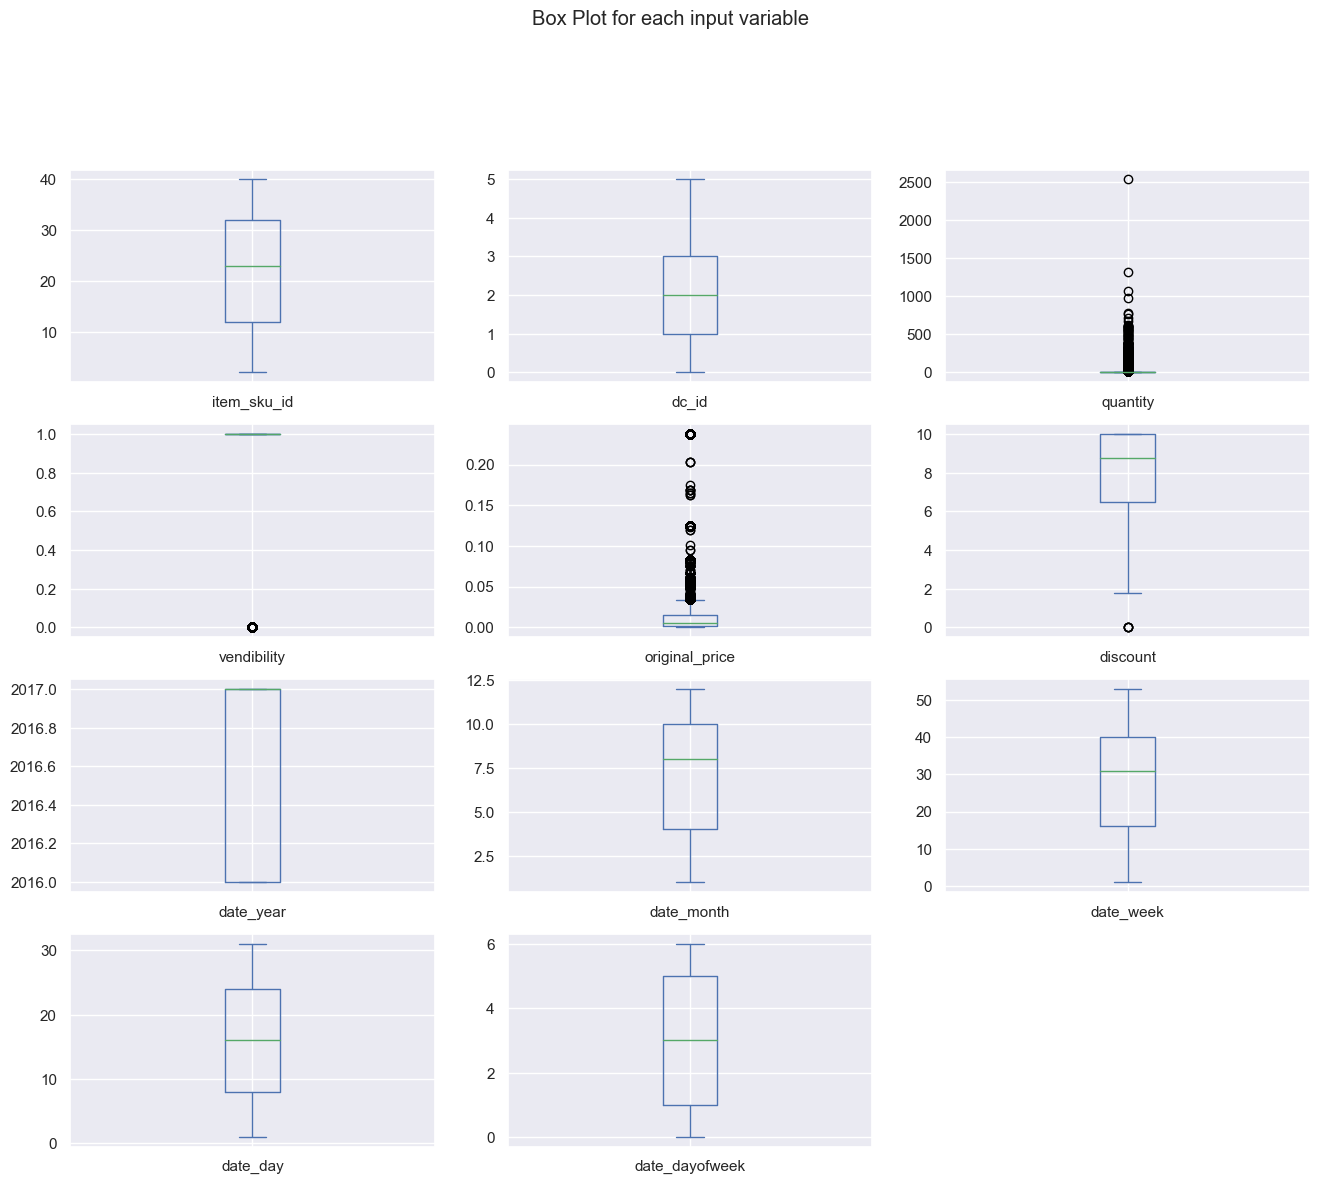

In [48]:
sku_data_set.drop('date', axis=1).plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(16,16), title='Box Plot for each input variable')
plt.savefig('Plots/data_set_box_plot')
plt.show()

Text(0.5, 1.0, 'Heatmap SKU Data')

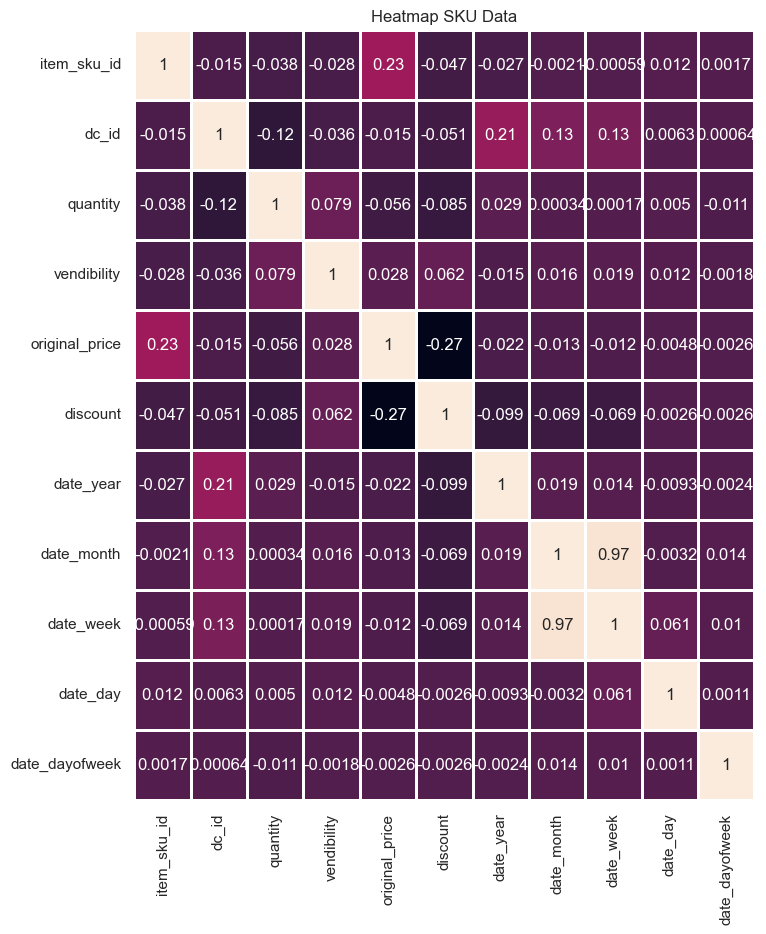

In [49]:
# Heatmap
correl = sku_data_set.corr()
ax1 = sns.heatmap(correl, cbar=0, linewidths=1, annot=True)

plt.savefig('Plots/data_set_heatmap')
plt.title("Heatmap SKU Data")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

# independent features: 'dc_id', 'date', 'quantity', 'vendibility', 'original_price', 'discount'
# dependent feature: 'item_sku_id'
X_train, X_test, y_train, y_test = train_test_split(sku_data_set.drop(columns = ['item_sku_id','date']), 
                                                    sku_data_set['item_sku_id'],
                                                    stratify = sku_data_set['item_sku_id'],
                                                    test_size=0.20, 
                                                    random_state=35)

# Dimensions of train data
X_train.shape
# Display header of train data
X_train.head()

# Dimensions of test data
X_test.shape
# Display header of test data
X_test.head()

(57326, 10)

,dc_id,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
70312,4,0.00,1.00,0.00,10.00,2017,4,16,22,5
43522,2,2.00,1.00,0.04,7.66,2017,5,19,11,3
52468,0,0.00,1.00,0.01,7.48,2017,3,12,26,6
33391,2,0.00,1.00,0.01,4.99,2017,12,51,20,2
18927,1,0.00,0.00,0.00,9.21,2017,12,50,13,2


(14332, 10)

,dc_id,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
38456,3,1.00,1.00,0.02,7.67,2017,10,43,23,0
10254,4,0.00,1.00,0.01,6.20,2017,7,28,12,2
23388,1,3.00,0.00,0.00,5.00,2017,8,33,17,3
27438,3,1.00,1.00,0.03,10.00,2017,10,42,18,2
44010,3,0.00,1.00,0.00,2.84,2017,12,48,1,4


In [51]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

# Dimensions of train data
X_train.shape
# Display header of train data
X_train.head()

# Dimensions of test data
X_test.shape
# Display header of test data
X_test.head()

(57326, 10)

,dc_id,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
70312,1.21,-0.27,0.46,-0.40,0.96,0.65,-0.87,-0.85,0.69,0.99
43522,-0.07,-0.19,0.46,0.40,-0.16,0.65,-0.58,-0.64,-0.55,-0.01
52468,-1.35,-0.27,0.46,-0.09,-0.25,0.65,-1.17,-1.12,1.14,1.49
33391,-0.07,-0.27,0.46,-0.20,-1.44,0.65,1.48,1.52,0.47,-0.50
18927,-0.71,-0.27,-2.17,-0.37,0.58,0.65,1.48,1.45,-0.32,-0.50


(14332, 10)

,dc_id,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
38456,0.57,-0.23,0.46,-0.06,-0.16,0.65,0.89,0.98,0.81,-1.50
10254,1.21,-0.27,0.46,-0.20,-0.86,0.65,0.01,-0.04,-0.44,-0.50
23388,-0.71,-0.15,-2.17,-0.41,-1.43,0.65,0.30,0.30,0.13,-0.01
27438,0.57,-0.23,0.46,0.18,0.96,0.65,0.89,0.91,0.24,-0.50
44010,0.57,-0.27,0.46,-0.38,-2.47,0.65,1.48,1.31,-1.68,0.49


## Clasification using Logistic Regression

In [52]:
performLogistic = True

if performLogistic:
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'auto', penalty = 'none', max_iter = 1000)
    logreg.fit(X_train, y_train)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
    
    # Find out accuracy on test data
    print('Fraction of correct classification:', logreg.score(X_test, y_test))

C:\Users\arpit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

Accuracy of Logistic regression classifier on training set: 0.42
Fraction of correct classification: 0.4140385152107173


## Classification using RandomForestClassifier

0.9509123259951854

<AxesSubplot:title={'center':'Feature Importances'}>

Text(60.0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

original_price   0.56
discount         0.17
quantity         0.09
date_week        0.04
dc_id            0.03
dtype: float64

Fraction of correct classification: 0.9045492603963159


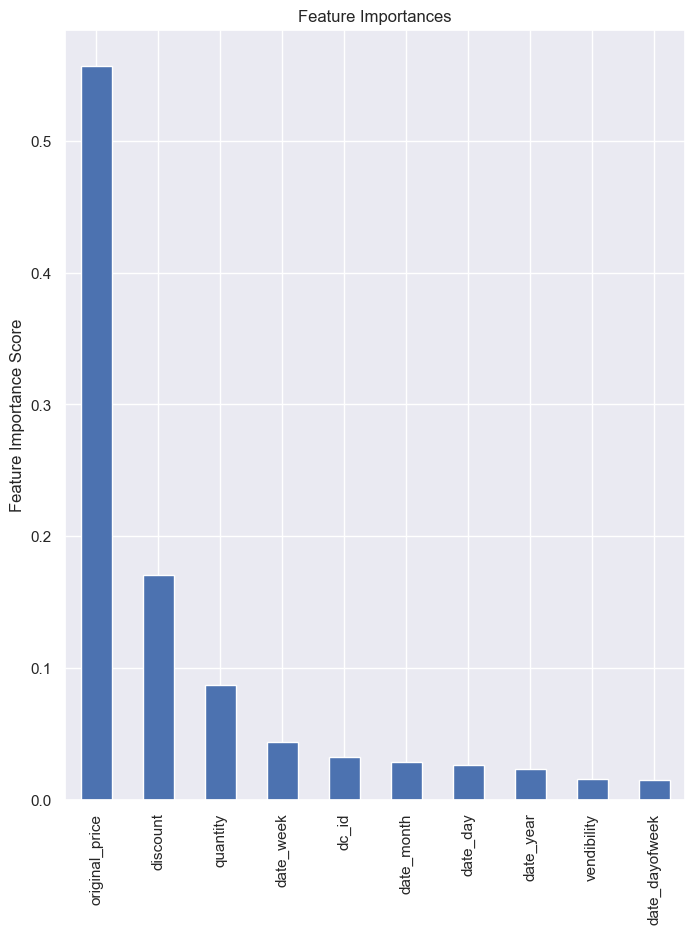

<Figure size 2000x1000 with 0 Axes>

In [53]:
performrf = True

if performrf:
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state=50, min_samples_leaf = 4, max_features = "sqrt", n_estimators = 1000)

    rf = rf.fit(X_train, y_train) 
    rf.score(X_train, y_train) 

    # rf.feature_importances_
    feat_imp = pd.Series(rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

    feat_imp_table = pd.DataFrame(feat_imp)
    feat_imp_table = feat_imp_table.reset_index()
    feat_imp_table.columns = ['Features', 'Values']
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.savefig('Plots/feature_importance_randomForest')
    plt.ylabel('Feature Importance Score')
    plt.figure(figsize=[40,20], dpi = 50)
    feat_imp.head()
    
    # Find out accuracy on test data
    print('Fraction of correct classification:', rf.score(X_test, y_test))

## Classification using GradientBoostingClassifier

0.9467257439905105

<AxesSubplot:title={'center':'Feature Importances'}>

Text(59.875, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

original_price   0.76
quantity         0.09
discount         0.06
vendibility      0.03
date_week        0.02
dtype: float64

Fraction of correct classification: 0.9240859614847893


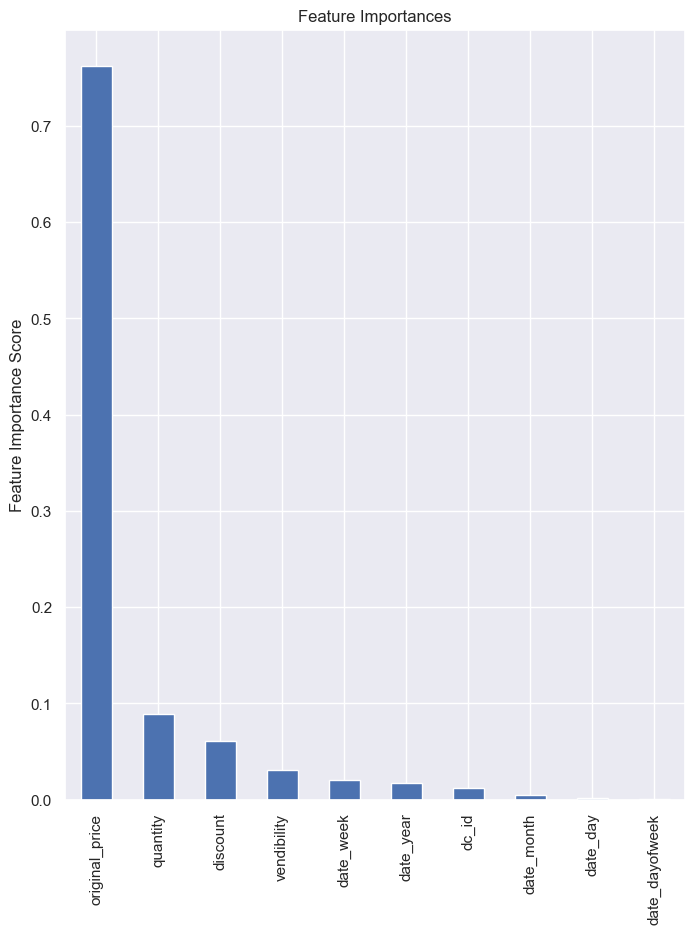

<Figure size 2000x1000 with 0 Axes>

In [54]:
performgb = True

if performgb:
    from sklearn.ensemble import GradientBoostingClassifier
    gb = GradientBoostingClassifier(random_state=50, min_samples_split = 6, min_samples_leaf = 3, max_depth = 4, n_estimators = 100)
    gb = gb.fit(X_train, y_train) 
    gb.score(X_train, y_train) 

    # gb.feature_importances_
    feat_imp = pd.Series(gb.feature_importances_, X_train.columns.values).sort_values(ascending=False)

    feat_imp_table = pd.DataFrame(feat_imp)
    feat_imp_table = feat_imp_table.reset_index()
    feat_imp_table.columns = ['Features', 'Values']
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.savefig('Plots/feature_importance_gradientBoosting')
    plt.ylabel('Feature Importance Score')
    plt.figure(figsize=[40,20], dpi = 50)
    feat_imp.head()
    
    # Find out accuracy on test data
    print('Fraction of correct classification:', gb.score(X_test, y_test))

## Classification using HistGradientBoostingClassifier

In [55]:
performhgbc = True

if performhgbc:
    from sklearn.ensemble import HistGradientBoostingClassifier
    clf = HistGradientBoostingClassifier().fit(X_train, y_train)
    clf.score(X_train, y_train)
    
    # Find out accuracy on test data
    print('Fraction of correct classification:', clf.score(X_test, y_test))

0.9225133447301399

Fraction of correct classification: 0.9025955902874686


## File for Prediction

In [56]:
# Read file
student_test = pd.read_csv('Data/student_test.csv', 
                       parse_dates=['date'], 
                       infer_datetime_format=True)
# Dimensions
student_test.shape
# Display header
student_test.head()

(864, 7)

,serial_number,dc_id,date,quantity,vendibility,original_price,discount
0,0,0,2017-12-23,0,0,NaN,NaN
1,1,3,2017-12-30,0,1,NaN,NaN
2,2,0,2017-12-18,0,0,NaN,NaN
3,3,3,2017-12-18,0,0,NaN,NaN
4,4,1,2017-12-25,5,0,0.00,2.87


In [57]:
student_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   serial_number   864 non-null    int64         
 1   dc_id           864 non-null    int64         
 2   date            864 non-null    datetime64[ns]
 3   quantity        864 non-null    int64         
 4   vendibility     864 non-null    int64         
 5   original_price  390 non-null    float64       
 6   discount        390 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 47.4 KB


In [58]:
student_test.isna().sum()

# Total test data size - 864
# Number of NaN values in them - 474

# Approach 1: Replace NANs with 0
if fillNaN:
    student_test = student_test.fillna(method=methodForNaN)
    student_test = student_test.fillna(0)
else:
    student_test = student_test.dropna()
student_test.isna().sum()
student_test.info()

serial_number       0
dc_id               0
date                0
quantity            0
vendibility         0
original_price    474
discount          474
dtype: int64

serial_number     0
dc_id             0
date              0
quantity          0
vendibility       0
original_price    0
discount          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   serial_number   864 non-null    int64         
 1   dc_id           864 non-null    int64         
 2   date            864 non-null    datetime64[ns]
 3   quantity        864 non-null    int64         
 4   vendibility     864 non-null    int64         
 5   original_price  864 non-null    float64       
 6   discount        864 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 47.4 KB


In [59]:
student_test.date.head()
student_test['date_year'] = student_test['date'].dt.year
student_test['date_month'] = student_test['date'].dt.month
student_test['date_week'] = student_test['date'].dt.isocalendar().week
student_test['date_day'] = student_test['date'].dt.day
student_test['date_dayofweek'] = student_test['date'].dt.dayofweek
student_test.head()
student_test.info()

0   2017-12-23
1   2017-12-30
2   2017-12-18
3   2017-12-18
4   2017-12-25
Name: date, dtype: datetime64[ns]

,serial_number,dc_id,date,quantity,vendibility,original_price,discount,date_year,date_month,date_week,date_day,date_dayofweek
0,0,0,2017-12-23,0,0,0.00,0.00,2017,12,51,23,5
1,1,3,2017-12-30,0,1,0.00,0.00,2017,12,52,30,5
2,2,0,2017-12-18,0,0,0.00,0.00,2017,12,51,18,0
3,3,3,2017-12-18,0,0,0.00,0.00,2017,12,51,18,0
4,4,1,2017-12-25,5,0,0.00,2.87,2017,12,52,25,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   serial_number   864 non-null    int64         
 1   dc_id           864 non-null    int64         
 2   date            864 non-null    datetime64[ns]
 3   quantity        864 non-null    int64         
 4   vendibility     864 non-null    int64         
 5   original_price  864 non-null    float64       
 6   discount        864 non-null    float64       
 7   date_year       864 non-null    int64         
 8   date_month      864 non-null    int64         
 9   date_week       864 non-null    UInt32        
 10  date_day        864 non-null    int64         
 11  date_dayofweek  864 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(8)
memory usage: 78.6 KB


In [60]:
student_test_output = pd.DataFrame(student_test['serial_number'], index = student_test.index)
student_test_output.head()

,serial_number
0,0
1,1
2,2
3,3
4,4


In [61]:
student_test = student_test.drop(columns = ['serial_number','date'])

In [62]:
student_test = pd.DataFrame(scaler.transform(student_test), columns = student_test.columns, index = student_test.index)

In [63]:
student_test_output['item_sku_id'] = gb.predict(student_test)
student_test_output.head()

,serial_number,item_sku_id
0,0,9
1,1,9
2,2,34
3,3,5
4,4,3


In [64]:
student_test_output.to_csv('Output/student_test_output.csv', index=False)